# Análisis y visualización de datos abiertos con python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = "data_clean/MFC_ActualizacionNov2022_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)
df.tail()


,Panteón_origen,Estatus_FC,Fecha_inhumación,Fecha_inhumación_diasemana,Fecha_inhumación_semanaaño,Fecha_defunción,Fecha_defunción_diasemana,Fecha_defunción_semanaaño,Restos_tipo,Sexo,Edad,Edad_años,Conocido_Desconocido,Primer_apellido,Segundo_Apellido,Nombres,Nombre_completo,Institución_origen,Tipo_institución_origen
ID,,,,,,,,,,,,,,,,,,,
XX-P996,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,NaT,NaN,NaN,Cadáver,Masculino,42,42.0,Conocido,Flores,Rosette,Sergio,Sergio Flores Rosette,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P997,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2017-10-27,Viernes,43.0,Cadáver,Masculino,64,64.0,Conocido,Juarez,Chavez,Juan Carlos,Juan Carlos Juarez Chavez,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P998,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2018-08-18,Sábado,33.0,Cadáver,Masculino,NaN,NaN,Desconocido,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial
XX-P999,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2018-05-22,Martes,21.0,Cadáver,Femenino,1,1.0,Desconocido,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial
XX-P1000,Panteón Civil de Dolores,Inhumación,2018-09-01,Sábado,35,2018-05-29,Martes,22.0,Cadáver,Masculino,NaN,NaN,Desconocido,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial


# 6 Estadística básica

## 6.1 Frecuencia

En estadística, la frecuencia de un evento es el número de veces en que dicho evento se repite durante un experimento o muestra estadística.​ Comúnmente, la distribución de la frecuencia suele visualizarse con una tabla de conteo o un histograma.

Por ejemplo, para ver la frecuencia de las edades podemos usar la función `.value_counts()` la cual cuenta cuantas veces aparece cada valor. Esta función nos regresa los valores ordenados de más frecuente a menos frecuente. 

Podemos ordenar esta tabla por las edades, las cuales se encuentran en el indice, para ver las frecuencias de las edades.
Sin embargo, esta función no incluye las edades que no aparecen, por ejemplo 2 años.

In [2]:
df['Edad_años'].value_counts().sort_index()

1.0     1
5.0     1
6.0     1
11.0    2
13.0    2
       ..
93.0    3
94.0    2
95.0    2
96.0    2
97.0    1
Name: Edad_años, Length: 87, dtype: int64

Una opción si queremos que se cuenten los valores que son cero es usar bins de tamaño uno que vayan de cero a cien.
Esto genera "cajas" con un formato `(min_value, max_value]`. El parentesis `(` significa que ese valor no se incluye, sino que es el rango menor, el corchete `]` significa que el valor si se incluye y es el rango mayor.

In [3]:
min_edad = int( df['Edad_años'].min() )
max_edad = int( df['Edad_años'].max() )

edad_freq = df['Edad_años'].value_counts(bins=range(min_edad-1,max_edad)).sort_index()
edad_freq

(-0.001, 1.0]    1
(1.0, 2.0]       0
(2.0, 3.0]       0
(3.0, 4.0]       0
(4.0, 5.0]       1
                ..
(91.0, 92.0]     2
(92.0, 93.0]     3
(93.0, 94.0]     2
(94.0, 95.0]     2
(95.0, 96.0]     2
Name: Edad_años, Length: 96, dtype: int64

Modifiquemos el indice para que sea más facil de leer.

In [4]:
edad_freq.index = range(min_edad,max_edad)
edad_freq

1     1
2     0
3     0
4     0
5     1
     ..
92    2
93    3
94    2
95    2
96    2
Name: Edad_años, Length: 96, dtype: int64

Graficando se puede notar varias cosas. 
Por ejemplo, la edad que se encuentra más veces es 50, tenemos pocos cuerpos de menos de 20 años, además las edades que terminan en cinco son más comunes.

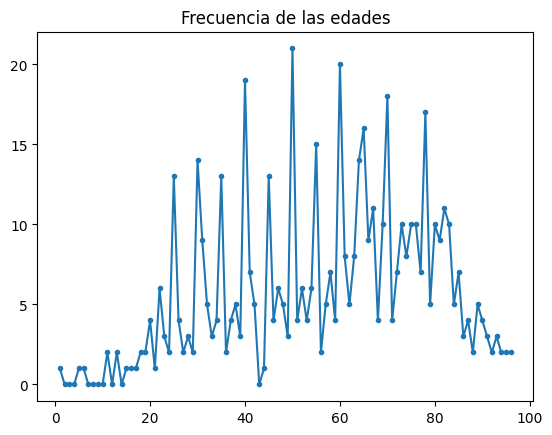

In [5]:
edad_freq.plot(style='.-', title="Frecuencia de las edades")
plt.show()

## 6.2 Promedio, mediana y moda

El promedio o media de un conjunto de datos se encuentra al sumar todos los números en el conjunto de datos y luego al dividir entre el número de valores en el conjunto. 

In [6]:
df['Edad_años'].mean()

57.6530612244898

La mediana es el valor medio cuando un conjunto de datos se ordena de menor a mayor. Se recomienda usar esta medida estadística cuando los datos tienen valores atípicos o outliers, los cuales pueden sesgar el valor del promedio.

In [7]:
df['Edad_años'].median()

60.0

La moda es el valor más común en el conjunto de datos. Este es el valor que esperariamos encontrar hasta arriba de la función `.value_counts()` ya que su frecuencia es la más alta. Es posible que una misma serie de datos tenga más de una moda cuando la frecuencia de varios valores es la misma.

In [8]:
df['Edad_años'].mode()

0    50.0
Name: Edad_años, dtype: float64

Grafiquemos los tres valores con la frecuencia de las edades.

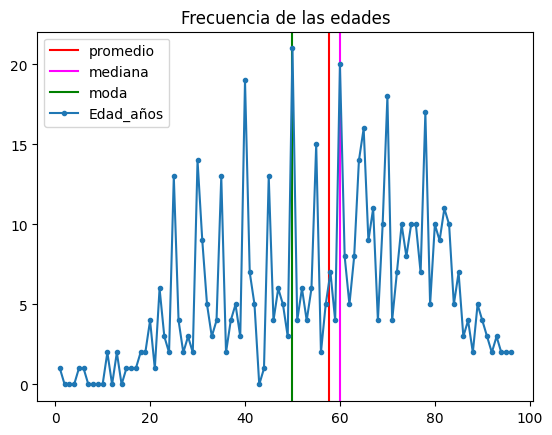

In [9]:
# graficas de las medidas estadísticas
plt.axvline(df['Edad_años'].mean(), color="red", label="promedio")
plt.axvline(df['Edad_años'].median(), color="magenta", label="mediana")
plt.axvline(df['Edad_años'].mode()[0], color="green", label="moda")
# grafica de la frecuencia de las edades
edad_freq.plot(style='.-', title="Frecuencia de las edades")
# Leyenda y mostrar gráfica
plt.legend()
plt.show()

## 6.3 Asimetría



El asimetría indica si los datos se concentran en un lado de la curva. Se obtiene usado la funcion .skew().
* Una asimetría negativa ($asim<0$) implica que hay más valores distintos a la iquierda del promedio (media). 
* Una asimetría cero ($asim=0$)  implica que hay la misma cantidad de valores de ambos lados del promedio (media).
* Una asimetría positiva ($asim>0$) implica que hay más valores distintos a la derecha del promedio (media). 

Por ejemplo, viendo las edades podemos notar que hay mas registros de personas de edad avanzada que de niños, por lo que la gráfica tiene un sesgo hacia izquierda. Por lo tanto esperamos que la asimetría sea negativa

In [10]:
df['Edad_años'].skew()

-0.3044617377225089

Cuando los datos tienen muchos picos, como es el caso con las edades, puede ayudar verlos con un KDE o histograma.

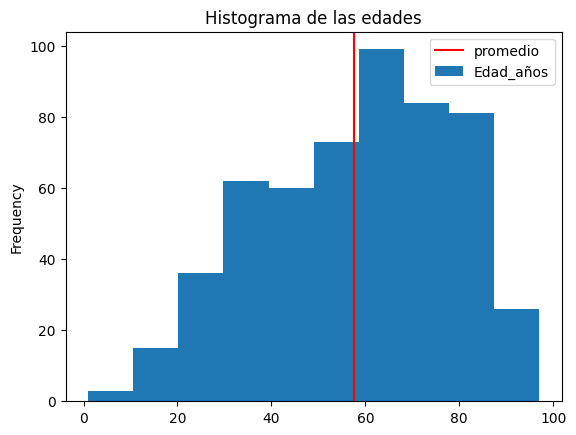

In [11]:
# graficas de las medidas estadísticas
plt.axvline(df['Edad_años'].mean(), color="red", label="promedio")
# grafica de la frecuencia de las edades
df['Edad_años'].plot.hist(title="Histograma de las edades")
# Leyenda y mostrar gráfica
plt.legend()
plt.show()

## 6.4 Varianza y desviación estandar

La varianza es una medida estadística que representa la dispersión de un conjunto de datos alrededor de su media o valor promedio. La varianza se expresa en unidades al cuadrado, lo que significa que no tiene las mismas unidades que los datos originales. 

Para obtener una medida más interpretable, se puede tomar la raíz cuadrada de la varianza, lo que resulta en la desviación estándar. La desviación estándar es una medida de dispersión más comúnmente utilizada que la varianza, ya que tiene las mismas unidades que los datos originales y es más fácil de interpretar.

In [12]:
df['Edad_años'].std()

20.469949070794694

Una desviación estándar alta indica que los datos están más dispersos, mientras que una desviación estándar baja indica que los datos están más agrupados alrededor de la media.

Cuando un valor está a más de una desviación estándar de la media, significa que se encuentra en el extremo de la distribución de los datos. En una distribución normal, aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media, mientras que el 32% restante se encuentra fuera de esta zona.

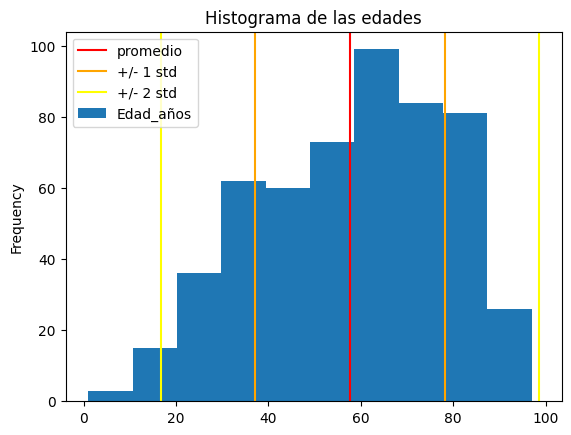

In [13]:
# graficas de las medidas estadísticas
plt.axvline(df['Edad_años'].mean(), color="red", label="promedio")
plt.axvline(df['Edad_años'].mean()+df['Edad_años'].std(), color="orange", label="+/- 1 std")
plt.axvline(df['Edad_años'].mean()-df['Edad_años'].std(), color="orange")
plt.axvline(df['Edad_años'].mean()+df['Edad_años'].std()*2, color="yellow", label="+/- 2 std")
plt.axvline(df['Edad_años'].mean()-df['Edad_años'].std()*2, color="yellow")
# grafica de la frecuencia de las edades
df['Edad_años'].plot.hist(title="Histograma de las edades")
# Leyenda y mostrar gráfica
plt.legend()
plt.show()

## 6.5 Valores atípicos

Un valor atípico (en inglés outlier) es una observación que es numéricamente distante del resto de los datos. 

Una regla comúnmente utilizada para identificar outliers en una distribución normal es la "regla de las 3 desviaciones estándar". Según esta regla, cualquier valor que esté a más de 3 desviaciones estándar por encima o por debajo de la media se considera un outlier. Sin embargo, esta regla no siempre es aplicable a otras distribuciones o a situaciones en las que los datos tienen una distribución no normal.



Por ejemplo, veamos los años de defunción de los registros del MFC.

In [14]:
df['Fecha_defunción'].dt.year.value_counts().sort_index()

2001.0      1
2012.0      1
2014.0      9
2015.0     42
2016.0    127
2017.0    234
2018.0    300
2019.0    173
Name: Fecha_defunción, dtype: int64

En la práctica, es común utilizar técnicas estadísticas más sofisticadas para detectar outliers, como el análisis de boxplots, gráficos de dispersión o métodos basados en modelos estadísticos. En cualquier caso, la detección de outliers debe ser cuidadosa y considerar el contexto del análisis y las posibles causas de la presencia de valores atípicos en los datos.

En algunos casos, estos valores pueden ser errores de medición o datos incorrectos. En otros casos, pueden ser valores legítimos que reflejan una situación única o un evento excepcional. En cualquier caso, es importante examinar estos valores con cuidado para determinar su origen y su impacto en los resultados del análisis de los datos.

<AxesSubplot: >

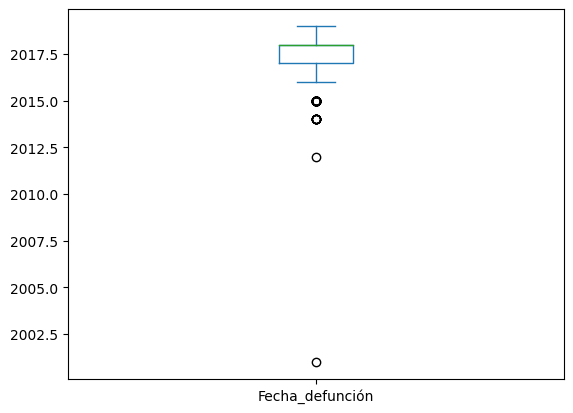

In [15]:
df['Fecha_defunción'].dt.year.plot.box()

En el caso de los valores categóricos se puede considerar que los valores atípicos son aquellos que tienen una frecuencia muy baja o muy alta.

Este valor se determina dependiendo del tipo de datos, pero generalmente se considera que un valor de baja frecuencia va del 1 al 5% del porcentaje de los datos.  Se recomienda tomar en cuenta los datos faltantes al revisar esto.

Por ejemplo veamos la distribución de `Institución_origen`

In [16]:
df['Institución_origen'].value_counts(dropna=False, normalize=True)

Instituto De Ciencias Forenses - Tribunal Superior De Justicia De La Ciudad De Mexico    0.533
Universidad Nacional Autonoma De Mexico - Facultad De Medicina                           0.331
Instituto Politecnico Nacional - Escuela Nacional De Medicina Y Homeopatia               0.058
Centro Cultural Universitario Justo Sierra                                               0.016
Universidad Westhill - Facultad De Medicina                                              0.015
Universidad Anahuac - Facultad De Ciencias De La Salud                                   0.013
The American British Cowdray Medical Center La.P.                                        0.009
Secretaria De La Defensa Nacional - Escuela Militar De Medicina                          0.007
Universidad Popular Autonoma Del Estado De Puebla                                        0.007
Universidad Tominaga Nakamoto S.C. Escuela De Medicina Ciencias Basicas                  0.004
Escuela De Medicina Saint Luke                    

En general, para detectar valores atípicos en variables categóricas es necesario tener un conocimiento profundo del contexto del análisis y de las posibles causas de la presencia de valores atípicos en los datos. También es importante utilizar varias técnicas de detección de outliers y comparar los resultados para tener una mayor confianza en las conclusiones.

## 6.6 Distribuciones estadísticas

La distribución de un conjunto de datos es la forma en que los datos se agrupan y se distribuyen a lo largo de un rango de valores. La distribución puede ser simétrica o asimétrica, y puede tener una o varias modas o picos.

Algunas distribuciones comunes incluyen la distribución normal, la distribución uniforme, la distribución de Poisson y la distribución exponencial. Cada una de estas distribuciones tiene una forma característica y se utiliza para modelar diferentes tipos de datos.

Es importante comprender la distribución de los datos porque puede afectar cómo se analizan y se interpretan. Por ejemplo, si los datos se distribuyen normalmente, se pueden utilizar pruebas estadísticas específicas para analizarlos, mientras que si los datos tienen una distribución asimétrica, puede ser necesario utilizar diferentes técnicas de análisis.

Las distribuciones uniforme, normal, exponencial y Poisson son algunos de los tipos más comunes de distribuciones de probabilidad en estadística.

**Distribución uniforme**: Es una distribución de probabilidad en la que todos los valores posibles tienen la misma probabilidad de ocurrir. Es decir, la probabilidad de que un valor se encuentre en cualquier intervalo de la distribución es proporcional al tamaño del intervalo. Por ejemplo, si se lanza un dado justo, la probabilidad de obtener cualquier número del 1 al 6 es igual.  
![Distribución uniforme](images/320px-Uniform_distribution_PDF.png)

**Distribución normal**: También conocida como distribución Gaussiana, es una distribución de probabilidad en la que los valores se agrupan alrededor de la media y tienen una forma de campana simétrica. Muchas variables en la naturaleza, como la altura o el peso, siguen una distribución normal. En esta distribución, la media y la desviación estándar son los parámetros principales que describen la distribución.  
![Distribución normal](images/320px-Normal_distribution_pdf.png)

**Distribución exponencial**: Es una distribución de probabilidad que se utiliza para modelar el tiempo que transcurre entre eventos sucesivos e independientes. Por ejemplo, el tiempo que transcurre entre dos terremotos o el tiempo que transcurre entre dos llamadas telefónicas. En esta distribución, el parámetro principal es la tasa de eventos, que es el número promedio de eventos que ocurren por unidad de tiempo.  
![Distribución exponencial](images/300px-Exponential_pdf.svg.png)

**Distribución Poisson**: Es una distribución de probabilidad que se utiliza para modelar el número de eventos raros que ocurren en un intervalo de tiempo o espacio determinado. Por ejemplo, el número de llamadas de emergencia que recibe una central telefónica en una hora o el número de accidentes de tráfico que ocurren en una intersección durante un mes. En esta distribución, el parámetro principal es la tasa de eventos, que es el número promedio de eventos que ocurren en un intervalo de tiempo o espacio determinado.  
![Distribución poisson](images/Poisson_pmf.svg.png)

Cada una de estas distribuciones de probabilidad se utiliza para modelar diferentes tipos de datos y situaciones en estadística y tienen sus propias propiedades y características.

# 7 Data Wrangling

## 7.1 Tablas pivote
Una tabla pivote (o tabla dinámica) es una herramienta que se utiliza en hojas de cálculo y programas de análisis de datos para resumir grandes cantidades de información en un formato más fácil de entender y analizar.
En una tabla pivote, se puede tomar un conjunto de datos y resumirlos en una tabla que muestre las relaciones entre diferentes variables. La tabla pivote permite crear informes de resumen y análisis de datos dinámicos que se pueden actualizar fácilmente en función de los cambios en los datos subyacentes.

La tabla pivote se puede utilizar para realizar diferentes operaciones, como la suma, el promedio, el conteo, el máximo y el mínimo, en los datos de origen. También se pueden aplicar filtros y ordenar los datos en función de las necesidades del usuario. La tabla pivote es especialmente útil para analizar grandes cantidades de datos y para visualizar tendencias y patrones.

La función `.pivot_table()` se utiliza para crear tablas pivotes en un DataFrame, y permite agregar y resumir datos según uno o varios campos (o columnas) de interés. Esta función toma los siguientes parámetros:

* values: es la columna o columna(s) que se quieren resumir
* index: es la columna(s) que se utilizan como índice (filas) en la nueva tabla
* columns: es la columna(s) que se utilizan como columnas en la nueva tabla
* aggfunc: es la función de agregación que se desea aplicar a los valores en la tabla pivote. Por defecto es la función de agregación mean (promedio).
* fill_value: es el valor que se utiliza para rellenar los valores faltantes (NaN) en la tabla pivote.
* dropna: ignorar o no los valores faltantes

Por ejemplo, calculemos el promedio de las edades para el tipos de restos y el sexo

**Nota**: Si no especificamos el parametro `values` se aplicará la funcion de agregación `aggfunc` a todas las columnas de la tabla. 

In [17]:
pd.pivot_table(df, index='Restos_tipo', columns='Sexo', values='Edad_años', aggfunc='mean')

Sexo,Femenino,Masculino
Restos_tipo,,
Cadáver,61.027778,54.836449
Restos humanos,19.200000,31.000000
Restos cremados,68.140351,68.376712
Miembros,55.666667,36.537037



Si se quiere calcular una tabla pivote para una variable derivada de los datos es necesario generarla y agregarla a la tabla. Por ejemplo, supongamos que queremos calcular el número de inhumanciones por año y tipo de restos. En ese caso es necesario usar generar una nueva variable "Fecha_inhumacion_año" y calcular el tamaño de cada grupo con `size`.

**Nota**: La función  `count` es muy similar pero no incluye los `nan`, por lo que los valores pueden variar.

In [18]:
df['Fecha_inhumacion_año'] = df['Fecha_inhumación'].dt.year

In [19]:
pd.pivot_table(df, index='Restos_tipo', columns='Fecha_inhumacion_año',
               aggfunc='size')

Fecha_inhumacion_año,2017,2018,2019,2020
Restos_tipo,,,,
Cadáver,160,191,294,1
Restos humanos,11,4,5,0
Restos cremados,0,100,117,0
Restos óseos,1,0,0,0
Feto,2,16,22,0
Miembros,28,24,24,0


Podemos usar varias columnas cualquiera de los ejes de la tabla pivote.

In [20]:
pd.pivot_table(df, index=['Sexo','Restos_tipo'],
               columns=['Fecha_inhumacion_año'], 
               aggfunc='size')

Fecha_inhumacion_año           2017  2018  2019  2020
Sexo          Restos_tipo                            
Femenino      Cadáver            20    29    30     1
              Restos humanos      2     0     4     0
              Restos cremados     0    25    35     0
              Restos óseos        0     0     0     0
              Feto                0     7     1     0
              Miembros            4     4     7     0
Indeterminado Cadáver             0     0     1     0
              Restos humanos      0     1     1     0
              Restos cremados     0     0     0     0
              Restos óseos        1     0     0     0
              Feto                1     1     4     0
              Miembros            1     1     1     0
Masculino     Cadáver           140   162   263     0
              Restos humanos      9     3     0     0
              Restos cremados     0    75    82     0
              Restos óseos        0     0     0     0
              Feto                1     8    17     0
              Miembros           23    19    16     0

Es posible utilizar otras funciones, por ejemplo usemos `pd.Series.mode` para regresar el valor más común.

In [21]:
pd.pivot_table(df, values='Tipo_institución_origen', 
               index='Restos_tipo', columns='Fecha_inhumacion_año', 
               aggfunc=pd.Series.mode, dropna=False)

Fecha_inhumacion_año,2017,2018,2019,2020
Restos_tipo,,,,
Cadáver,Institución judicial,Institución judicial,Institución judicial,Institución judicial
Restos humanos,Institución judicial,Institución judicial,Institución judicial,NaN
Restos cremados,NaN,Escuela pública,Escuela pública,NaN
Restos óseos,Institución judicial,NaN,NaN,NaN
Feto,Institución judicial,Institución judicial,Institución judicial,NaN
Miembros,Institución judicial,Institución judicial,Institución judicial,NaN


También se pueden definir funciones propias para procesar los datos.

In [22]:
def unir_textos_unicos_en_serie(series):
    textos = series.unique().sort_values()
    textos = ', '.join(textos)
    return textos

pd.pivot_table(df, values='Fecha_inhumación_diasemana', 
               index='Restos_tipo', columns='Fecha_inhumacion_año', 
               aggfunc=unir_textos_unicos_en_serie, dropna=False)

Fecha_inhumacion_año,2017,2018,2019,2020
Restos_tipo,,,,
Cadáver,"Jueves, Viernes, Sábado","Martes, Miercoles, Jueves, Viernes, Sábado, Do...","Lunes, Martes, Miercoles, Jueves, Sábado",Lunes
Restos humanos,Sábado,Sábado,"Miercoles, Sábado",NaN
Restos cremados,NaN,Sábado,"Miercoles, Sábado",NaN
Restos óseos,Miercoles,NaN,NaN,NaN
Feto,Sábado,Sábado,Sábado,NaN
Miembros,"Martes, Miercoles, Viernes, Sábado",Sábado,Sábado,NaN


## 7.2 Melt

La función `.melt()` sirve para transformar y reorganizar un conjunto de datos en formato "ancho" en un formato "largo". La transformación implica tomar columnas de datos y reorganizarlas en filas.
La función permite especificar qué columnas de un DataFrame deben mantenerse como identificadores y cuáles deben transformarse en variables. También permite renombrar las columnas resultantes para facilitar el análisis de los datos.

Por ejemplo, veamos la siguiente tabla pivote.

In [23]:
df_edad_promedio = pd.pivot_table(df, values='Edad_años', 
                                  index='Restos_tipo', columns='Sexo')
df_edad_promedio

Sexo,Femenino,Masculino
Restos_tipo,,
Cadáver,61.027778,54.836449
Restos humanos,19.200000,31.000000
Restos cremados,68.140351,68.376712
Miembros,55.666667,36.537037


Supongamos que queremos transformarla a formato de tidy data, en ese caso cada observación debería de estar en una fila.

El primer paso es volver el indice en una columna de valores.

In [24]:
df_edad_promedio = df_edad_promedio.reset_index()
df_edad_promedio

Sexo,Restos_tipo,Femenino,Masculino
0,Cadáver,61.027778,54.836449
1,Restos humanos,19.200000,31.000000
2,Restos cremados,68.140351,68.376712
3,Miembros,55.666667,36.537037


La función `.melt()` transforma los datos de las columnas a filas.

En cierta forma esta función el la inversa de `.pivot_table()`, aunque se puede perder información, como vemos en este caso.

In [25]:
pd.melt(df_edad_promedio, id_vars='Restos_tipo', value_vars=['Femenino','Masculino'], value_name='Edad_promedio')

,Restos_tipo,Sexo,Edad_promedio
0,Cadáver,Femenino,61.027778
1,Restos humanos,Femenino,19.200000
2,Restos cremados,Femenino,68.140351
3,Miembros,Femenino,55.666667
4,Cadáver,Masculino,54.836449
5,Restos humanos,Masculino,31.000000
6,Restos cremados,Masculino,68.376712
7,Miembros,Masculino,36.537037


## 7.3 Split-apply-combine

El pipeline [split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html) es un enfoque muy común en el análisis de datos y se refiere a un proceso de tres pasos:
* Split (división): El conjunto de datos original se divide en grupos basados en una o más columnas. En primer lugar, se divide el conjunto de datos en grupos basados en una o varias columnas utilizando la función groupby(). Esto genera un objeto GroupBy que contiene los grupos y se puede aplicar una función o transformación a cada grupo por separado.
* Apply (aplicación): Se aplica alguna función o transformación a cada grupo por separado. Luego, se aplica alguna función o transformación a cada grupo por separado. Esta función puede ser de varios tipos:
    * Aggregation (agregación): calcular una estadística resumen (o varias estadísticas) para cada grupo. Por ejemplo calcular la suma o tamaño de los grupos.
    * Transform (transformación): realizar algunos cálculos específicos del grupo y devolver un objeto con el mismo índice.  Por ejemplo rellenar los valores perdidos (NA) dentro de un grupo con un valor derivado de ese mismo grupo.
    * Filter (filtración): descartar algunos grupos, según un cálculo por grupo que evalúa Verdadero o Falso. Por ejemplo descartar datos que pertenecen a grupos con muy pocos miembros.
    * Alguna combinación de lo anterior
* Combine (combinación): Los resultados de cada grupo se combinan en un único DataFrame utilizando la función concat(), merge() u otra función de combinación de Pandas.

A combinación veremos una introducción a este pipeline, aunque se recomienda ver la documentación de [split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html) y de [merge, join, concatenate and compare]()

## 7.4 Groupby y aggregate

La función `.groupby()` divide el conjunto de datos de datos de acuerdo a los valores de una o más columnas. Esto genéra un objeto de grupos, a los cuales se les pueden aplicar funciones por separado.

Las funcion `.aggregate()` sirve para aplicar una o varias operaciones a cada grupo, las cuales resumen los valores.

Existen varias funciones de agregación:
* mean(): promedio
* sum(): suma de valores
* size(): tamaño del grupo
* count(): conteo del grupo
* std(): desviación estandar
* var(): varianza
* sem(): error estandar de la media de los grupos
* describe(): estadísticas descriptivas
* first(): primer valor
* last(): último valor
* nth(): n-esimo valor
* min(): valor mímino
* max(): valor máximo

Aunque no son las únicas y es posible definir funciones propias.

Por ejemplo, agrupemos los datos por sexo y tipo de restos y calculemos el promedio de edad. Se recomienda solo seleccionar los datos que se van a utilizar en el proceso.

In [26]:
df[['Sexo','Restos_tipo','Edad_años']].groupby(by=['Sexo','Restos_tipo']).mean()

Edad_años
Sexo          Restos_tipo               
Femenino      Cadáver          61.027778
              Restos humanos   19.200000
              Restos cremados  68.140351
              Restos óseos           NaN
              Feto                   NaN
              Miembros         55.666667
Indeterminado Cadáver                NaN
              Restos humanos         NaN
              Restos cremados        NaN
              Restos óseos           NaN
              Feto                   NaN
              Miembros               NaN
Masculino     Cadáver          54.836449
              Restos humanos   31.000000
              Restos cremados  68.376712
              Restos óseos           NaN
              Feto                   NaN
              Miembros         36.537037

Es posible aplicar varias funciones al mismo tiempo.

Si queremos podemos renombrar las columnas resultantes con el comando `.rename()`.

In [27]:
df[['Restos_tipo','Edad_años']].groupby(by='Restos_tipo') \
                        .agg(['min', 'max', pd.Series.mode, 'mean', 'std']) \
                        .rename(columns={ 
                                         "min": "edad minima", "max": "edad maxima", 
                                         "mode": "moda edad", "mean": "promedio edad",
                                         "std": "desviación estandar",
                                         })

Edad_años                                                \
                edad minima edad maxima           moda edad promedio edad   
Restos_tipo                                                                 
Cadáver                 1.0        97.0                40.0     55.728000   
Restos humanos         15.0        50.0  [22.0, 23.0, 45.0]     27.529412   
Restos cremados        20.0        96.0                78.0     68.310345   
Restos óseos            NaN         NaN                  []           NaN   
Feto                    NaN         NaN                  []           NaN   
Miembros                5.0        95.0                31.0     40.695652   

                                     
                desviación estandar  
Restos_tipo                          
Cadáver                   19.111752  
Restos humanos            11.341945  
Restos cremados           14.289345  
Restos óseos                    NaN  
Feto                            NaN  
Miembros                  21.668834

También se pueden aplicar distintas funciones a cada columna.

In [28]:
df.groupby(by=['Fecha_inhumacion_año','Fecha_inhumación_semanaaño']).agg({
   'Conocido_Desconocido':'size',
   'Restos_tipo':pd.Series.mode, 
   'Tipo_institución_origen':pd.Series.mode,
   })

Conocido_Desconocido  \
Fecha_inhumacion_año Fecha_inhumación_semanaaño                         
2017                 30                                             1   
                     40                                            32   
                     41                                            36   
                     42                                            25   
                     43                                             2   
                     44                                             6   
                     45                                            30   
                     47                                            30   
                     49                                            19   
                     50                                            21   
2018                 27                                           100   
                     28                                            23   
                     29                                            11   
                     35                                            12   
                     38                                            11   
                     39                                            21   
                     41                                            13   
                     42                                            23   
                     43                                            26   
                     46                                            10   
                     47                                            29   
                     48                                            13   
                     49                                            40   
                     50                                             3   
2019                 1                                             19   
                     2                                             23   
                     3                                             21   
                     4                                             26   
                     5                                             24   
                     6                                              4   
                     7                                             15   
                     8                                              1   
                     9                                             29   
                     11                                            24   
                     13                                           142   
                     14                                            18   
                     15                                            20   
                     16                                             4   
                     18                                            37   
                     19                                             4   
                     20                                            20   
                     21                                            23   
                     22                                             8   
2020                 15                                             1   

                                                                                       Restos_tipo  \
Fecha_inhumacion_año Fecha_inhumación_semanaaño                                                      
2017                 30                                                                    Cadáver   
                     40                                                                    Cadáver   
                     41                                                                    Cadáver   
                     42                                                                    Cadáver   
                     43                          ['Restos óseos', 'Miembros']


## 7.5 Merge, join, concatenate and compare

https://pandas.pydata.org/docs/user_guide/merging.html

In [39]:
df1 = pd.DataFrame( {
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
         },
         index=[0, 1, 2, 3],
)

df2 = pd.DataFrame({
         "B": ["B2", "B3", "B6", "B7"],
         "D": ["D2", "D3", "D6", "D7"],
         "F": ["F2", "F3", "F6", "F7"],
         },
         index=[2, 3, 6, 7],
      )

In [40]:
pd.concat([df1,df2])

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [41]:
pd.concat([df1,df2], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7
